<a href="https://colab.research.google.com/github/callee2006/MachineLearning/blob/master/linear_regression_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file contains practice examples of the following topics:

* Linear Regression	
  - Linear regression
  - Ridge ($L_2$ regularization)
  - Lasso ($L_1$ regularization)
  - ElasticNet ($L_1$ + $L_2$ regularization)
	
* Linear Classification	
  -	Logistic regression

(Most of the contents and code are from "Introduction to Machine Learning with Python" by Andreas C. Müller & Sarah Guido)

In [1]:
! pip install mglearn

import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Linear regression

>$\hat{y}=wx + b$

>$\hat{y}=w_1x_1+ w_2x_2+ ...+ b$

>$Loss_{linear} = \frac{1}{2N} \sum_i{(\hat{y}-y)^2}$
(least square)

See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Linear regression on wave dataset

w[0]: 0.393906  b: -0.031804


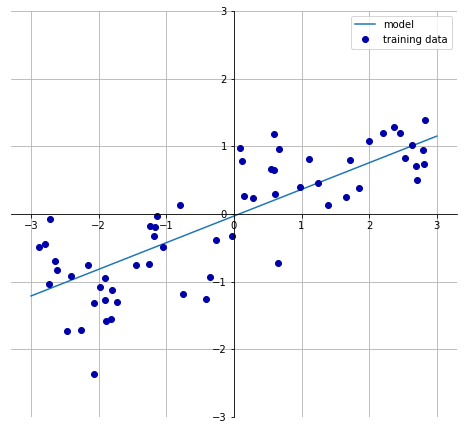

In [0]:
mglearn.plots.plot_linear_regression_wave()

In [0]:
from sklearn.linear_model import LinearRegression

# creates wave data
X, y = mglearn.datasets.make_wave(n_samples=60)

# split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
# regression (parameter estimation)
lr = LinearRegression().fit(X_train, y_train)

# check coeeficients and intercept
print("lr.coef_: ", lr.coef_)             # W
print("lr.intercept_:", lr.intercept_)      # b

lr.coef_:  [0.39390555]
lr.intercept_: -0.031804343026759746


score() Returns the coefficient of determination $R^2$ of the prediction $(1-u/v)$
 
 $u=\sum(\hat{y}-y)^2$ and $v=\sum(y-\bar{y})$, where $\bar{y}$ is the mean of $y$
  

In [0]:
# evaluation
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


# Exercises

Apply linear regression to sigmoid function

>$sigmoid(x) = \frac{1}{1+exp(-x)}$


## Data generation

1. generate X as an array
```
    X = np.arange(-10., 10., 0.2)
    X = np.expand_dims(X, axis = 1)
    
```

2. generate y as using sigmoid() and np.random.normal() functions

```   
>>  y = sigmoid(X[:, 0]) + np.random.normal(0, 0.1, size = [len(X)])
```


* Check shape of X and y



## Linear regression

1. Split data into training set and test set

2. import LinearRegression

3. Create a LinearRegression object

4. Train  (call fit() function )

5. Apply linear regression (call predict() function)

In [0]:
# sigmoid(x) function
def sigmoid(x):
  return 1. / (1. + np.exp(-x))

X.shape =  (100,)
X.shape =  (100, 1)
y.shape =  (100,)


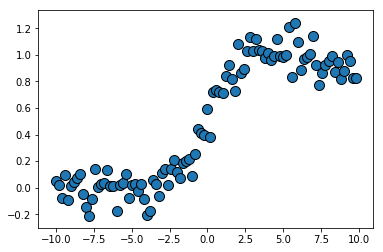

In [0]:
# generate random data using sigmoid and Gaussian random numbers

X = np.arange(-10., 10., 0.2)
print("X.shape = ", X.shape)
X = np.expand_dims(X, axis = 1)
print("X.shape = ", X.shape)

y = sigmoid(X[:, 0]) + np.random.normal(0, 0.1, size = [len(X)])
print("y.shape = ", y.shape)

mglearn.discrete_scatter(X[:, 0], y)

In [0]:
# TO DO: split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
# TO DO: import LinearRegression
from sklearn.linear_model import LinearRegression

# TO DO: regression (parameter estimation)
lr = LinearRegression().fit(X_train, y_train)

# TO DO: check coeeficients and intercept
print("lr.coef_: ", lr.coef_)             # W
print("lr.intercept_:", lr.intercept_)      # b

lr.coef_:  [0.06748357]
lr.intercept_: 0.5033030461101526


In [0]:
# display prediction results (y_hat) along with ground truth (y)
y_hat = lr.predict(X_test)

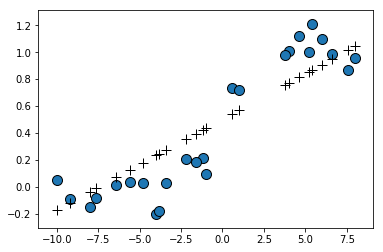

In [0]:
# Display predictino result
mglearn.discrete_scatter(X_test[:, 0], y_test, markers ='o')
mglearn.discrete_scatter(X_test[:, 0], y_hat, s = 10, markers ='+')

## Linear regression on Boston house price data

In [0]:
# load boston data
X, y = mglearn.datasets.load_extended_boston()

# split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape =", X_train.shape)
print("y_train.shape =", y_train.shape)
print("X_test.shape =", X_test.shape)
print("y_test.shape =", y_test.shape)

In [0]:
# create object 
lr = LinearRegression()

# train
lr.fit(X_train, y_train)

# the above two statements can be combined as the next line
# lr = LinearRegression().fit(X_train, y_train)

# check coefficients and intercept
print("lr.coef_:", lr.coef_)             # w
print("lr.intercept_:", lr.intercept_)   # b

In [0]:
# Performance evaluation
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))

In [0]:
# save and load model

import pickle

filename = 'linear'

pickle.dump(lr, open(filename, 'wb'))
lr2 = pickle.load(open(filename, 'rb'))

print("Training score: {:.2f}".format(lr2.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr2.score(X_test, y_test)))

==> Big difference between training accuracy and test accuracy: overfitting

## Ridge regression

> linear regression + L2 regularization

> $Loss_{ridge} = \frac{1}{2N} \sum_i{(\hat{y}-y)^2}+\alpha |W|^2$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [0]:
from sklearn.linear_model import Ridge

In [0]:
ridge = Ridge().fit(X_train, y_train)           # by default, alpha = 1

In [0]:
#print("ridge.coef_: {}".format(ridge.coef_))             # w
#print("ridge.intercept_: {}".format(ridge.intercept_))   # b

In [0]:
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge.score(X_test, y_test)))

Lower training accuracy, but higher test accuracy

In [0]:
# applying higher alpha  --> too strong constraint
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Training score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge10.score(X_test, y_test)))

In [0]:
# applying low alpha    --> appropriate constraint
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge01.score(X_test, y_test)))

In [0]:
# coefficient magnitude
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## Lasso regression

> linear regression + L1 regularization

> $Loss_{lasso}=\frac{1}{2N} \sum_i{(\hat{y}-y)^2} +\alpha |W|$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [0]:
from sklearn.linear_model import Lasso

In [0]:
# by default, alpha = 1
lasso = Lasso().fit(X_train, y_train)         # default alpha = 1, severe underfitting
print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

In [0]:
# Lasso with alpha = 0.01
lasso001 = Lasso(0.01, max_iter=100000).fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

In [0]:
# Lasso with alpha = 0.0001
lasso0001 = Lasso(0.0001, max_iter=100000).fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso0001.coef_ != 0))

In [0]:
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")

#plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## ElasticNet regression

> linear regression + L1 regularization + L2 regularization


> $Loss_{elastic\_net}=\frac{1}{2N} \sum_i{(\hat{y}-y)^2} +a |W| +\frac{1}{2}b|W|^2$

> $Loss_{elastic\_net}=\frac{1}{2N} \sum_i{(\hat{y}-y)^2} +\alpha\cdot \lambda |W| +\frac{1}{2} \alpha\cdot(1-\lambda)|W|^2$

 - $\alpha$: weight of regularization (L1 + L2)
 - $\lambda$: ratio of L1 regularization ($0 \leq\lambda\leq 1$)

 - $\alpha = a + b$, $\lambda = \frac{a}{a+b}$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [0]:
from sklearn.linear_model import ElasticNet

In [0]:
# by default, alpha = 1, l1_ratio = 0.5
elastic_net = ElasticNet().fit(X_train, y_train)
print("Training score: {:.2f}".format(elastic_net.score(X_train, y_train)))
print("Test score: {:.2f}".format(elastic_net.score(X_test, y_test)))
print("Number of features used:", np.sum(elastic_net.coef_ != 0))

In [0]:
# alpha = 0.01
elastic_net001 = ElasticNet(alpha=0.01, l1_ratio = 0.5).fit(X_train, y_train)
print("Training set score: {:.2f}".format(elastic_net001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic_net001.score(X_test, y_test)))
print("Number of features used:", np.sum(elastic_net001.coef_ != 0))

In [0]:
# alpha = 0.001
elastic_net0001 = ElasticNet(alpha=0.001, l1_ratio = 0.5).fit(X_train, y_train)
print("Training score: {:.2f}".format(elastic_net0001.score(X_train, y_train)))
print("Test score: {:.2f}".format(elastic_net0001.score(X_test, y_test)))
print("Number of features used:", np.sum(elastic_net0001.coef_ != 0))

In [0]:
# alpha = 0.0001
elastic_net00001 = ElasticNet(alpha=0.0001, l1_ratio = 0.5).fit(X_train, y_train)
print("Training score: {:.2f}".format(elastic_net00001.score(X_train, y_train)))
print("Test score: {:.2f}".format(elastic_net00001.score(X_test, y_test)))
print("Number of features used:", np.sum(elastic_net00001.coef_ != 0))

In [0]:
plt.plot(elastic_net.coef_, 'v', label="Lasso alpha=1")
plt.plot(elastic_net001.coef_, '^', label="ElasticNet alpha=0.01")
plt.plot(elastic_net0001.coef_, '^', label="ElasticNet alpha=0.001")
plt.plot(elastic_net00001.coef_, 's', label="Lasso alpha=0.0001")

#plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Linear classification

* Binary classification
> - class +1 if $f(x) = \sum_i{w_ix_i}+b = w_1 x_1 + w_2 x_2+...+b > 0$
> - class -1 if $f(x) = \sum_i{w_ix_i}+b = w_1 x_1 + w_2 x_2+...+b < 0$

> Note! Class boundary is hyperplane

* Multi-class classification: $ŷ = argmax_j {f_j(x)=[\sum_i{w_{ji} x_i} + b_j]} = argmax_j {[w_{j1} x_1 + w_{j2} x_2+...+b_j]}$

* Popular fitting algorithms
> * Logistic regression (linear_model.LogisticRegression)
> * (linear) Support Vector Machine (SVM)



## Logistic regression
* binary classification ($y$ = 0 or 1)
* $\hat{y} = sigmoid(\sum_i{w_ix_i+b})$
* $ Loss_{logistic} = \frac{1}{2N}(y - \hat{y})^2 + \alpha |W|_L$


See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LogisticRegression(),LinearSVC()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()

## hyper parameter C to control regularization 

**small C** means **stronger regularization**

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# C = 1
logreg = LogisticRegression().fit(X_train, y_train)
print("Training score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg.score(X_test, y_test))) 

In [0]:
# C = 100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg100.score(X_test, y_test)))

In [0]:
# C = 0.01
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test score: {:.3f}".format(logreg001.score(X_test, y_test)))

In [0]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

# Exercises: Apply LogisticRegression on three blob dataset

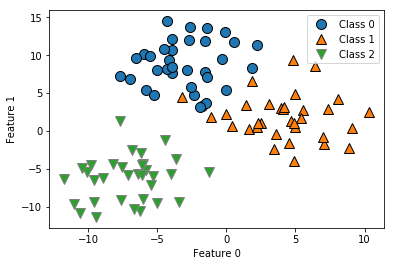

In [5]:
# creates dataset

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42, cluster_std = 3)     # cluster_std: standard deviation of each clusters
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [0]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
# TO DO: Import LogisticRegression
from sklearn.linear_model import LinearRegression

# TO DO: create a LogisticRegression instance
lr_blobs = LinearRegression()

# TO DO: train on the training set
lr_blobs.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# TO DO: check coefficients and intercept
print("lr_blobs.coef_: ", lr_blobs.coef_)               # W
print("lr_blobs.intercept_:", lr_blobs.intercept_)      # b

lr_blobs.coef_:  [-0.00540984 -0.1043011 ]
lr_blobs.intercept_: 1.1176806152041014


In [13]:
# TO DO: print accuracy on training and test sets
print("training accuracy = ", lr_blobs.score(X_train, y_train))
print("test accuracy = ", lr_blobs.score(X_test, y_test))

training accuracy =  0.8183567622049372
test accuracy =  0.7848288678063153
